# Project Journal

**Name:** Adriana Watson

**Research Question:** The Energy Policy Act of 2005 (EPAct) included legislation intended to promote the use of solar, wind, geothermal, hydroelectric, biomass, and biofuel energy consumption. Can the changes in renewable energy consumption after the implementation of EPAct be explained by the individual contributions of solar, wind, geothermal, hydroelectric, biomass, and biofuel consumption?

**Variables:**
$$Y: Total Renewable Energy \newline
X_1: Solar Energy \newline
X_2: Wind Energy \newline
X_3: Geothermal Energy \newline
X_4: Hydroelectric Power \newline
X_5: Biomass Energy Consumption \newline
X_6: Other Biofuels \newline
X_7: After\_EPAct \newline
X_8: EPAct\_Time 

## Data Prep & EDA
**Dates:** November 1 - November 7

**Meeting Date:** November 7

### Data Cleaning Summary

**Summary of data cleaning process:**
1. Load libraries
2. Import the dataset
3. Check for and fill missing values
4. Create new variables (```After_EPAct``` and ```EPAct_Time```)
5. Remove unnecessary columns

**Issues Encountered and Resolutions:**
Only minor syntax issues and forgetting to install libraries. 


In [43]:
# Step 1: Load the Necessary Libraries
#install.packages("lubridate")
#install.packages("corrplot")
#install.packages("GGally")
#install.packages("knitr")
library(GGally)      # Matrix of plots
library(dplyr)      # For data manipulation
library(ggplot2)    # For data visualization
library(lubridate)  # For date handling
library(corrplot)   # For correlation plots
library(knitr)
library(tidyr)

In [14]:
# Step 2: Import the Dataset
data <- read.csv("../USRenewableEnergyConsumption.csv")

In [15]:
# Step 3: Check for and Fill Missing Values
# Check for missing values
missing_values <- colSums(is.na(data))
print(missing_values)  # Print the count of missing values in each column

                              Year                              Month 
                                 0                                  0 
                            Sector                Hydroelectric.Power 
                                 0                                  0 
                 Geothermal.Energy                       Solar.Energy 
                                 0                                  0 
                       Wind.Energy                        Wood.Energy 
                                 0                                  0 
                      Waste.Energy Fuel.Ethanol..Excluding.Denaturant 
                                 0                                  0 
    Biomass.Losses.and.Co.products                     Biomass.Energy 
                                 0                                  0 
            Total.Renewable.Energy              Renewable.Diesel.Fuel 
                                 0                                  0 
      

In [16]:
data <- data %>%
  mutate(After_EPAct = ifelse((Year > 2005) | (Year == 2005 & Month >= 8), 1, 0),  # Binary variable
         EPAct_Time = ifelse(Year < 2005, 
                             -((2005 - Year) * 12 + (Month - 8)),  # Negative values before EPAct
                             (Year - 2005) * 12 + (Month - 8))  # Zero in Aug 2005, positive afterward
  )

In [17]:
# Step 5: Remove Unnecessary Columns and Select Relevant Columns
data <- data %>%
  select(Month = Month,                                    # Month
         Year = Year,                                      # Year
         Total_Renewable_Energy = Total.Renewable.Energy,  # Y
         Solar_Energy = Solar.Energy,                      # X_1
         Wind_Energy = Wind.Energy,                        # X_2
         Geothermal_Energy = Geothermal.Energy,            # X_3
         Hydroelectric_Power = Hydroelectric.Power,        # X_4
         Biomass_Energy_Consumption = Biomass.Energy,      # X_5
         Other_Biofuels = Other.Biofuels,                  # X_6
         After_EPAct,                                      # X_7
         EPAct_Time)                                       # X_8

In [18]:
head(data)

,Month,Year,Total_Renewable_Energy,Solar_Energy,Wind_Energy,Geothermal_Energy,Hydroelectric_Power,Biomass_Energy_Consumption,Other_Biofuels,After_EPAct,EPAct_Time
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1973,0.570,0,0,0.00,0.00,0.570,0,0,-377
2,1,1973,89.223,0,0,0.49,0.00,0.211,0,0,-377
3,1,1973,99.973,0,0,0.00,1.04,98.933,0,0,-377
4,1,1973,30.074,0,0,0.00,0.00,0.000,0,0,-377
5,1,1973,0.000,0,0,0.00,0.00,0.000,0,0,-377
6,2,1973,0.515,0,0,0.00,0.00,0.515,0,0,-378


### Exploratory Data Analysis Findings
**Key Visualizations:** 
* Based on the correlation matrix, significant correlations are: 
    * Total Renewable Energy & Biomass Energy Consumption
    * Solar Energy & Wind Energy
    * Wind Energy & Geothermal Energy
* The time series plot points to a steady increase in total renewable energy consumption after EPAct
* The histogram indicates that the mean energy consumption before and after EPAct was the same, but the range of values grew after EPAct

[1] "Significant Correlations (|correlation| > 0.5):"
                   Variable1              Variable2 Correlation
1        Hydroelectric_Power Total_Renewable_Energy   0.5011969
2 Biomass_Energy_Consumption Total_Renewable_Energy   0.6108683
3                Wind_Energy           Solar_Energy   0.7443091
4          Geothermal_Energy            Wind_Energy   0.5055562
5 Biomass_Energy_Consumption    Hydroelectric_Power   0.7199216


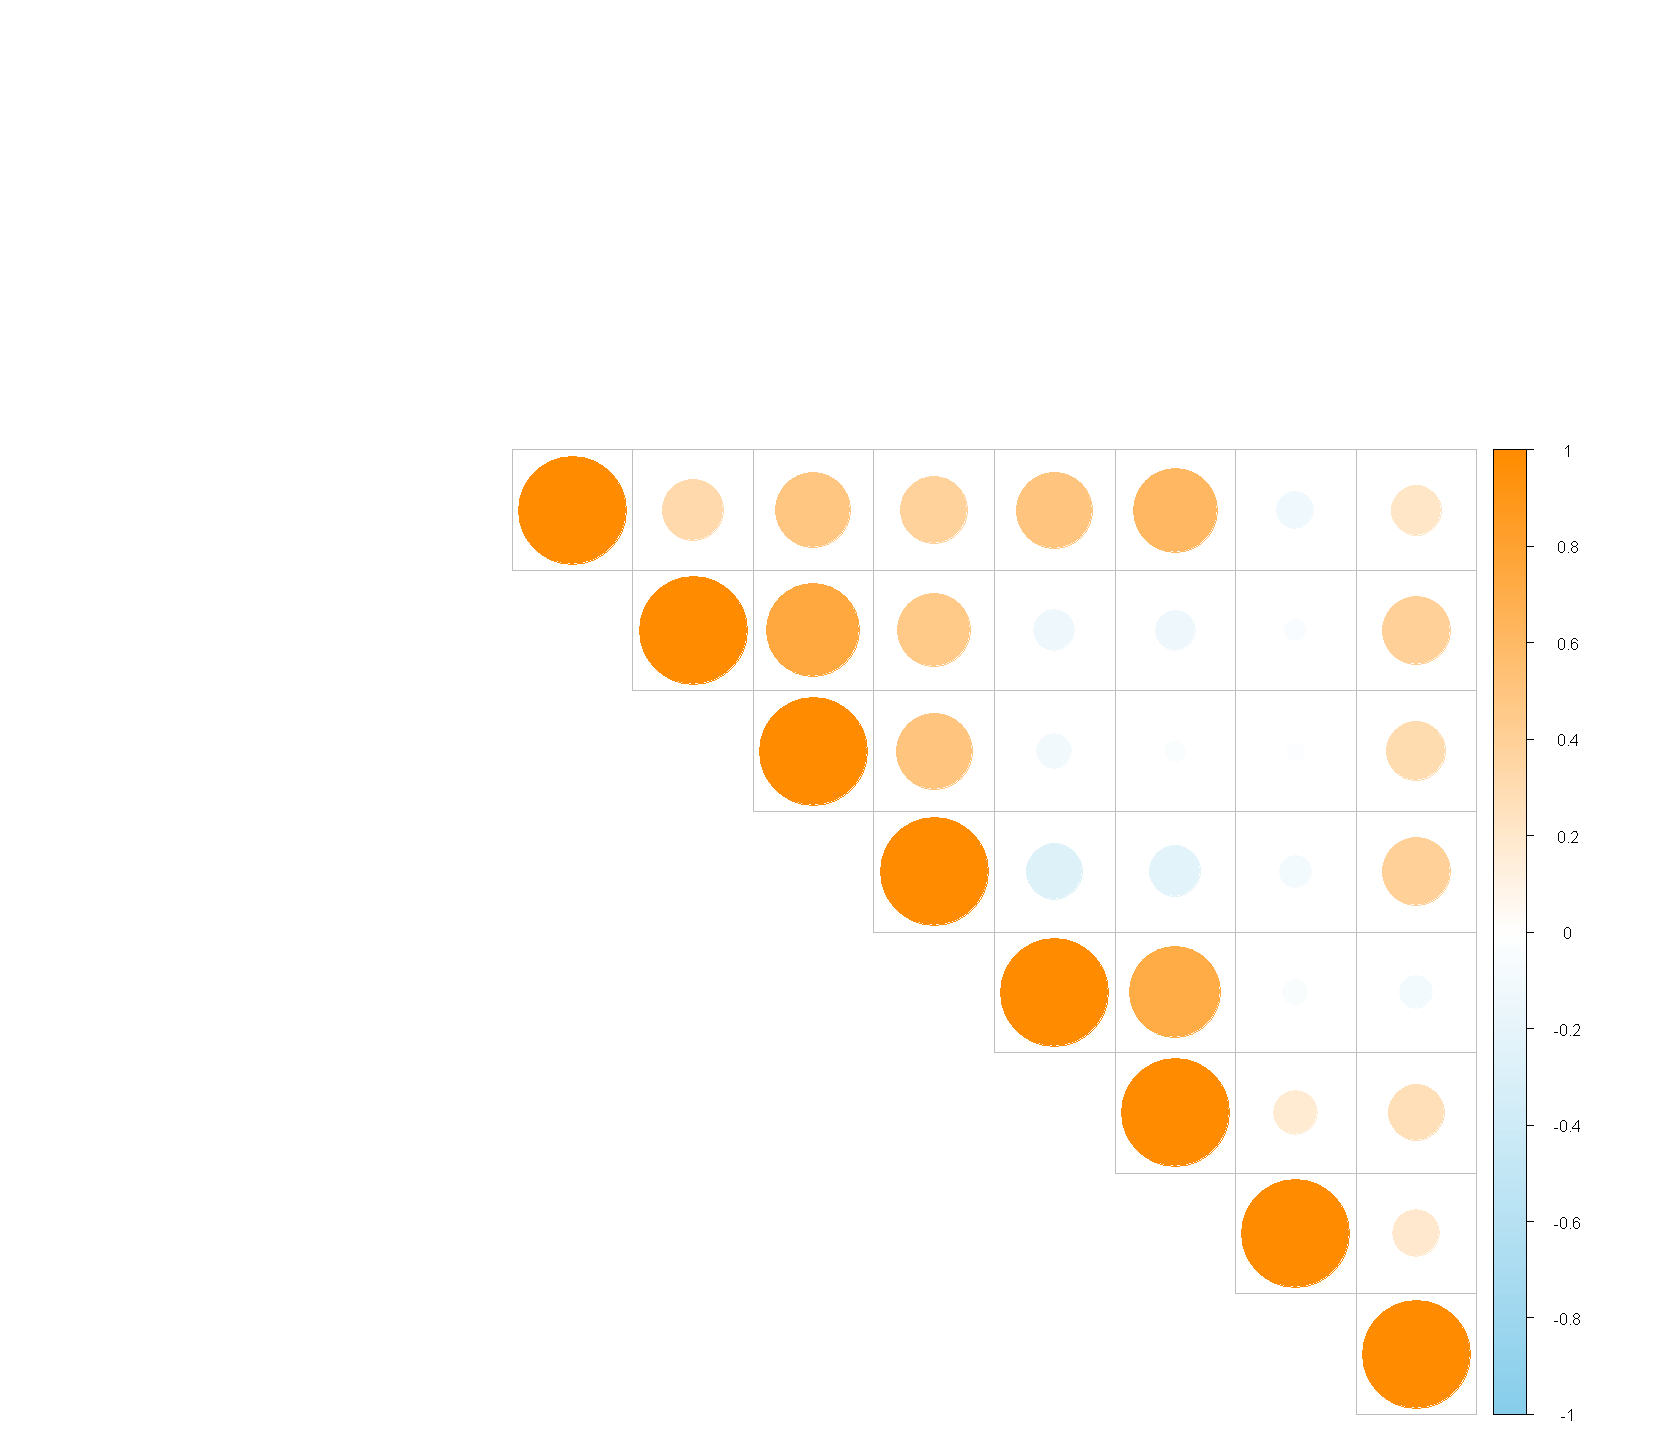

In [37]:
# Select only numeric variables, excluding 'After_EPAct' since it's binary
numeric_data <- data %>%
  select(Total_Renewable_Energy, Solar_Energy, Wind_Energy, Geothermal_Energy,
         Hydroelectric_Power, Biomass_Energy_Consumption, Other_Biofuels, EPAct_Time)

# Calculate the correlation matrix with complete observations only
correlation_matrix <- cor(numeric_data, use = "complete.obs")

# Extract significant correlations (absolute value > 0.5)
significant_correlations <- correlation_matrix[abs(correlation_matrix) > 0.5 & lower.tri(correlation_matrix, diag = FALSE)]
significant_pairs <- which(abs(correlation_matrix) > 0.5 & lower.tri(correlation_matrix, diag = FALSE), arr.ind = TRUE)
significant_correlations <- data.frame(
  Variable1 = rownames(correlation_matrix)[significant_pairs[,1]],
  Variable2 = colnames(correlation_matrix)[significant_pairs[,2]],
  Correlation = significant_correlations
)

# Print the significant correlations
print("Significant Correlations (|correlation| > 0.5):")
print(significant_correlations)

# Plot the entire correlation matrix
corrplot(
  correlation_matrix,
  method = "circle",
  type = "upper",
  col = colorRampPalette(c("skyblue", "white", "darkorange"))(200),
  tl.cex = 0.8,           # Text label size
  tl.col = "white",       # Label color
  cl.cex = 0.8            # Color legend size
)

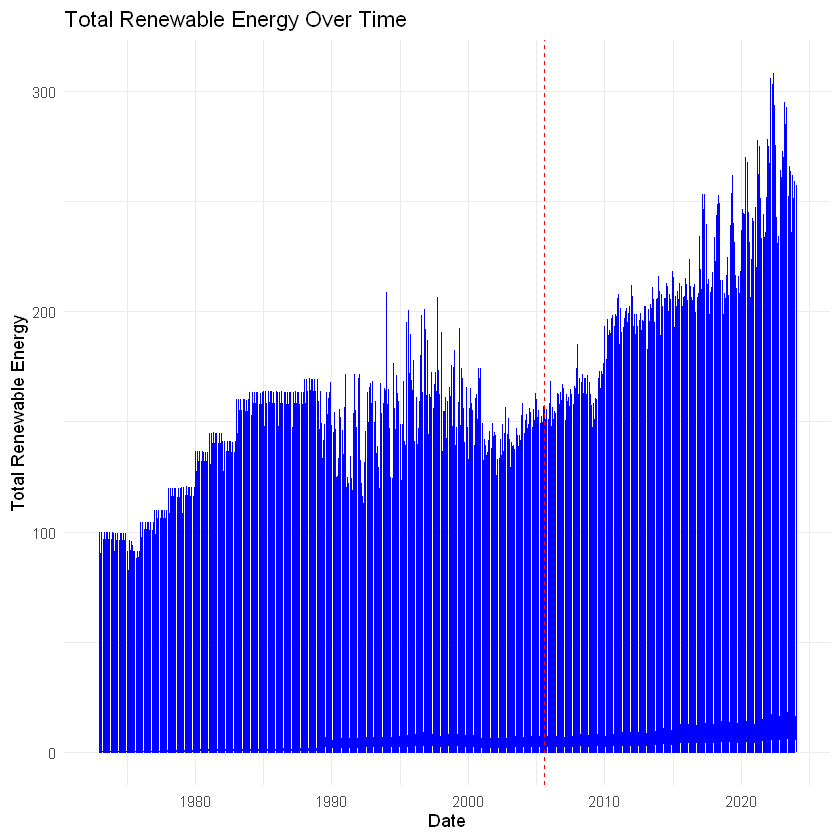

In [20]:
## Time Series Plot of Total Renewable Energy
# Create a 'Date' column for easier plotting
data <- data %>%
  mutate(Date = make_date(Year, Month))
ggplot(data, aes(x = Date, y = Total_Renewable_Energy)) +
  geom_line(color = "blue") +
  geom_vline(xintercept = as.Date("2005-08-01"), linetype = "dashed", color = "red") +
  labs(title = "Total Renewable Energy Over Time", y = "Total Renewable Energy", x = "Date") +
  theme_minimal()

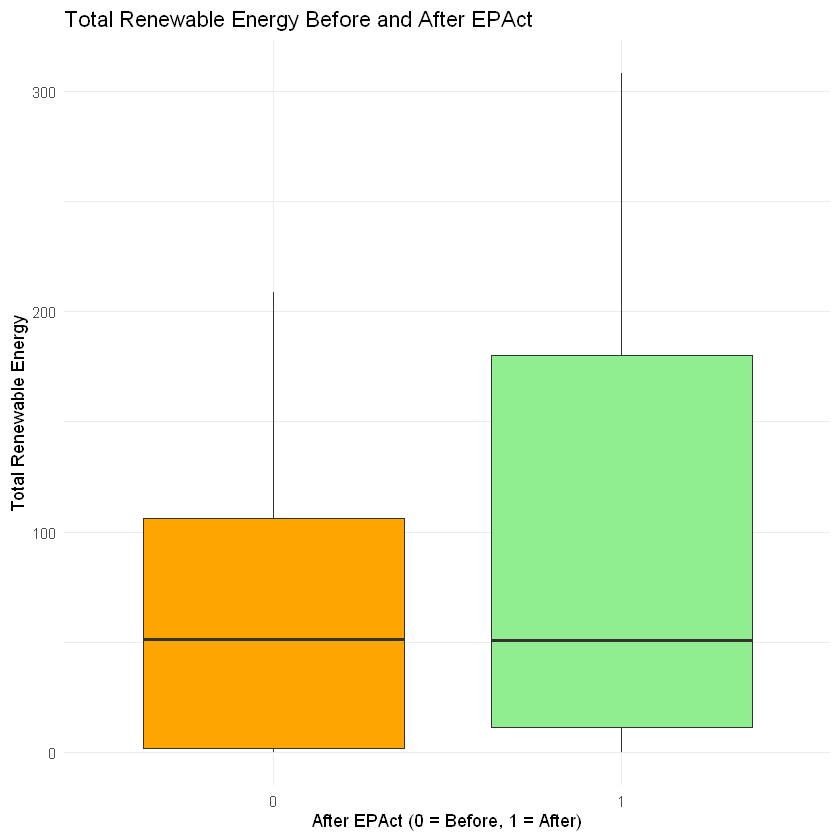

In [21]:
## Box Plot of Total Renewable Energy Before and After EPAct
ggplot(data, aes(x = as.factor(After_EPAct), y = Total_Renewable_Energy)) +
  geom_boxplot(fill = c("orange", "lightgreen")) +
  labs(title = "Total Renewable Energy Before and After EPAct", x = "After EPAct (0 = Before, 1 = After)", y = "Total Renewable Energy") +
  theme_minimal()

Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information."
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


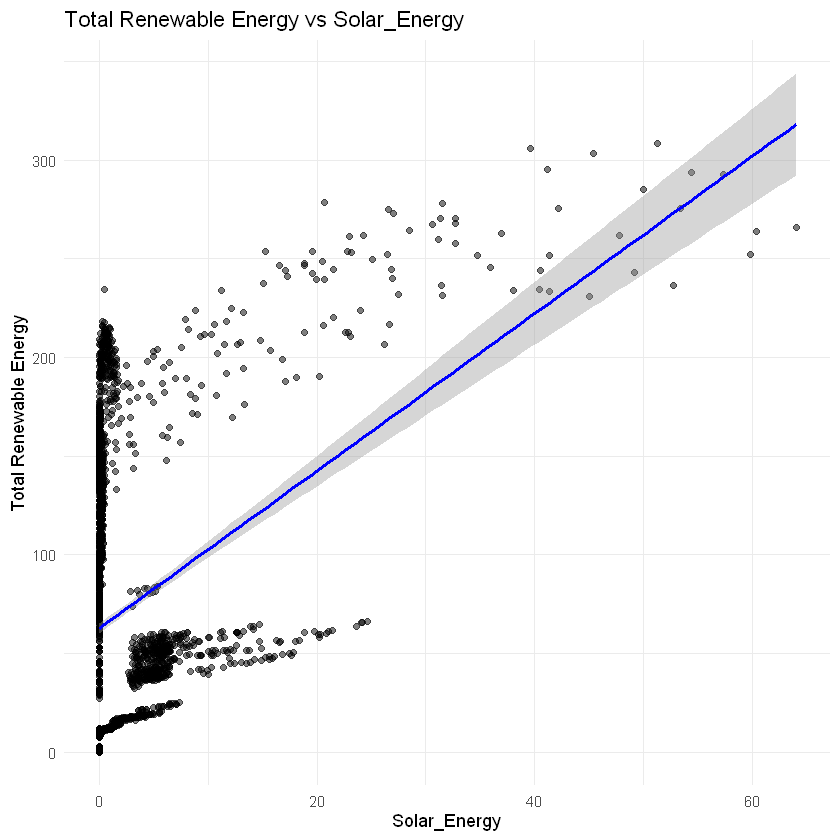

`geom_smooth()` using formula = 'y ~ x'


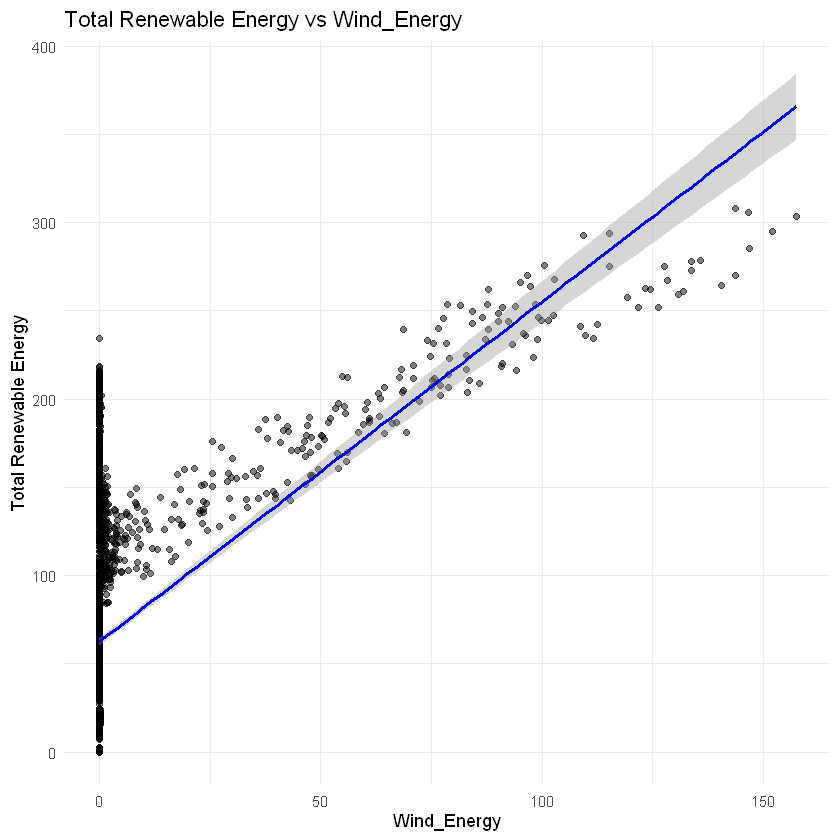

`geom_smooth()` using formula = 'y ~ x'


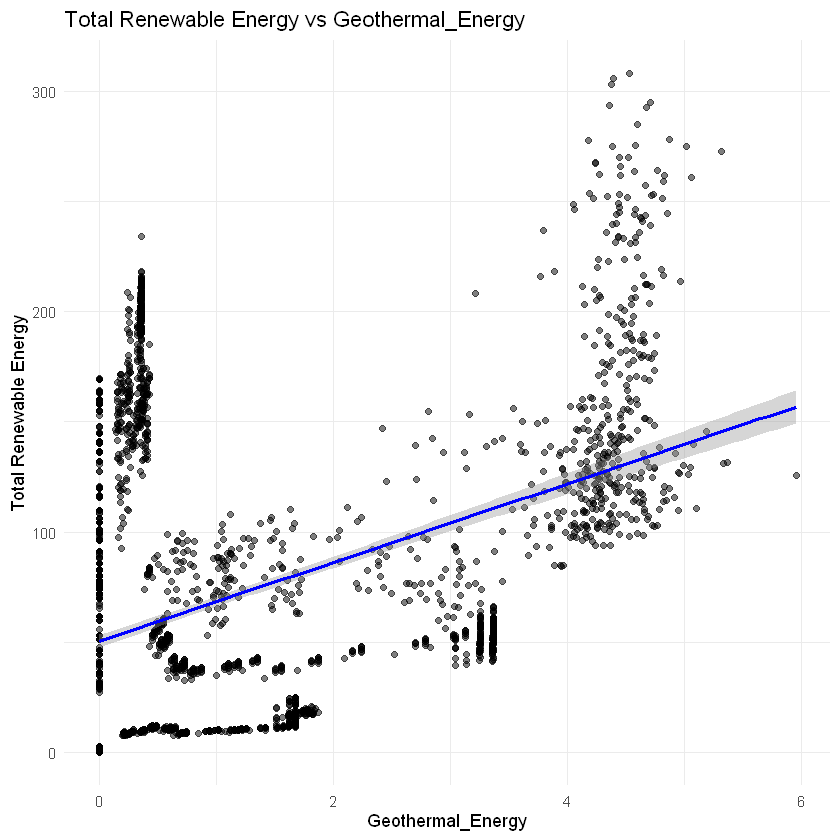

`geom_smooth()` using formula = 'y ~ x'


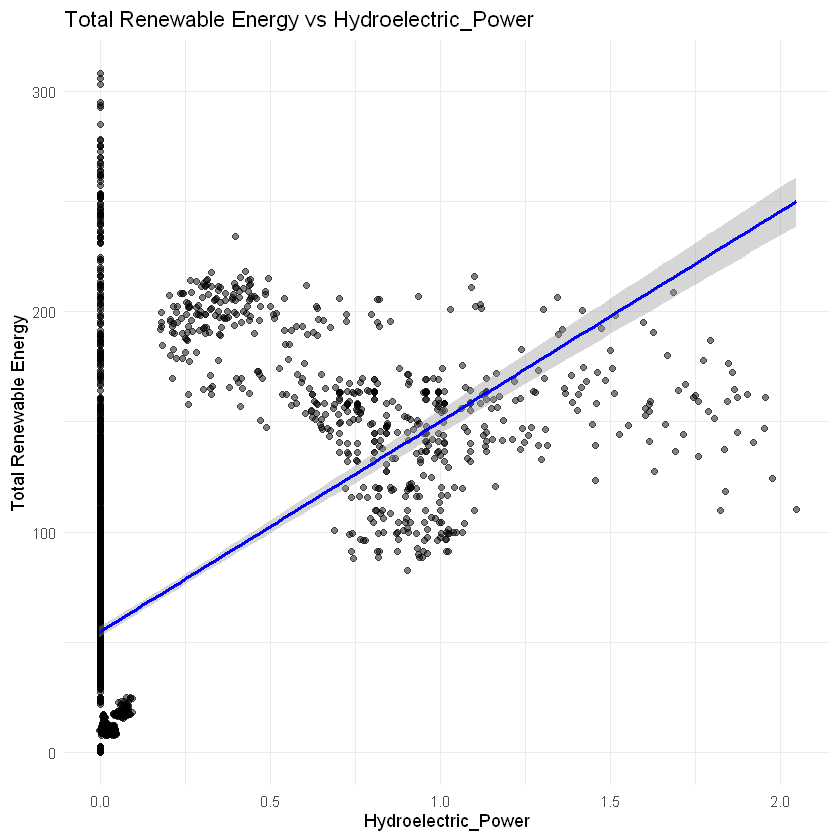

`geom_smooth()` using formula = 'y ~ x'


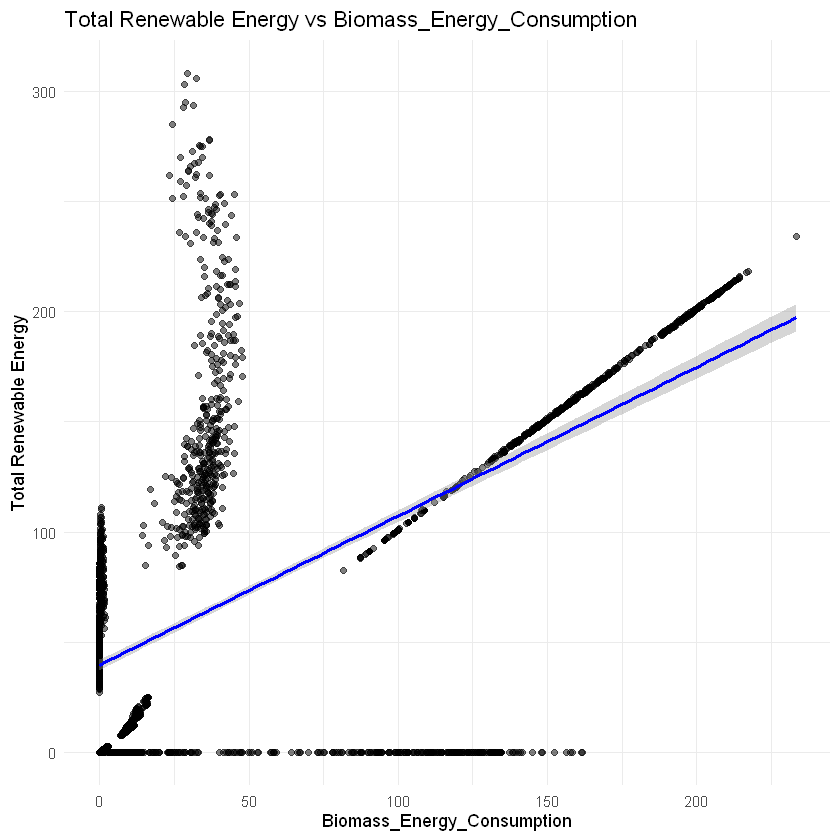

`geom_smooth()` using formula = 'y ~ x'


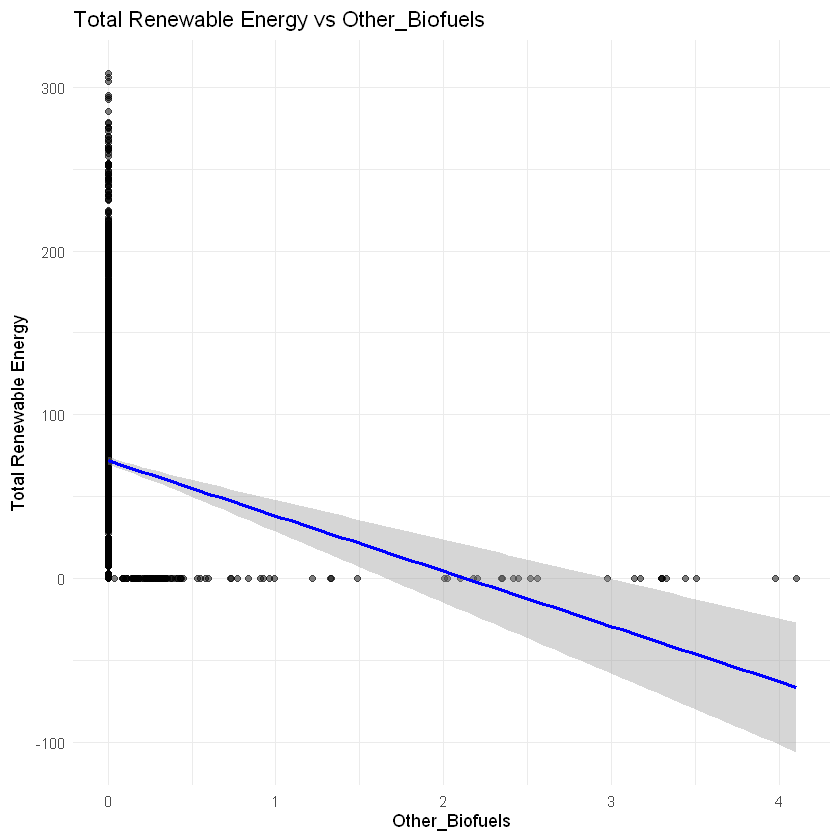

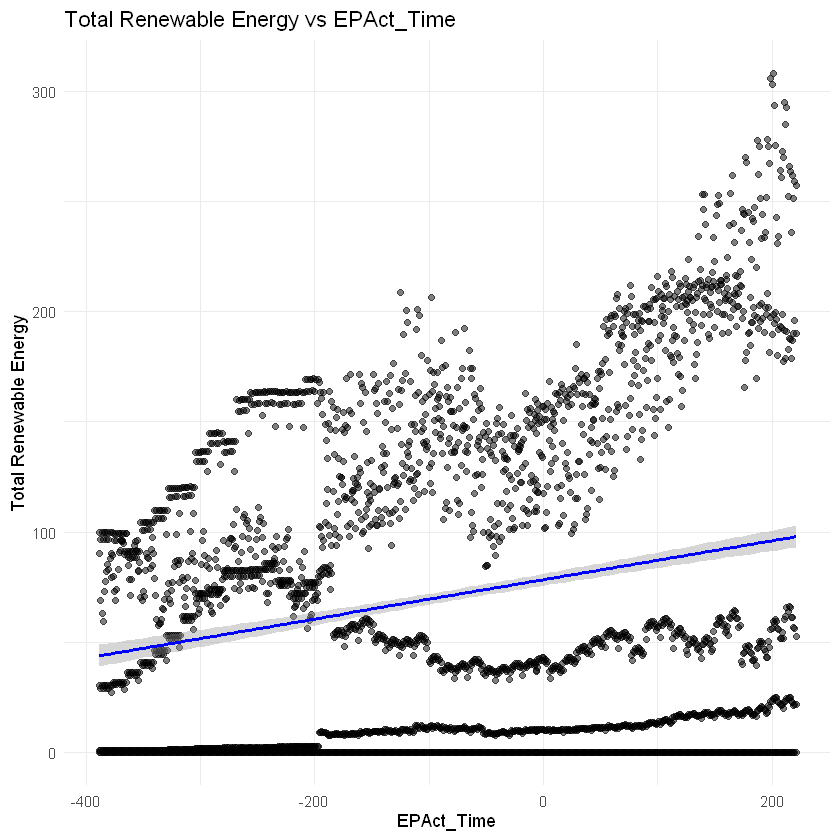

In [23]:
## Scatter Plots for each independent variable vs Total Renewable Energy
independent_vars <- c("Solar_Energy", "Wind_Energy", "Geothermal_Energy", 
                      "Hydroelectric_Power", "Biomass_Energy_Consumption", "Other_Biofuels", "EPAct_Time")
for (var in independent_vars) {
  print(ggplot(data, aes_string(x = var, y = "Total_Renewable_Energy")) +
          geom_point(alpha = 0.5) +
          geom_smooth(method = "lm", color = "blue") +
          labs(title = paste("Total Renewable Energy vs", var), y = "Total Renewable Energy", x = var) +
          theme_minimal())
}

### Summary Statistics

In [46]:
# Calculate summary statistics for each numeric column in the dataset
summary_stats <- data %>%
  summarise(
    Total_Renewable_Energy_mean = mean(Total_Renewable_Energy, na.rm = TRUE),
    Total_Renewable_Energy_sd = sd(Total_Renewable_Energy, na.rm = TRUE),
    Solar_Energy_mean = mean(Solar_Energy, na.rm = TRUE),
    Solar_Energy_sd = sd(Solar_Energy, na.rm = TRUE),
    Wind_Energy_mean = mean(Wind_Energy, na.rm = TRUE),
    Wind_Energy_sd = sd(Wind_Energy, na.rm = TRUE),
    Geothermal_Energy_mean = mean(Geothermal_Energy, na.rm = TRUE),
    Geothermal_Energy_sd = sd(Geothermal_Energy, na.rm = TRUE),
    Hydroelectric_Power_mean = mean(Hydroelectric_Power, na.rm = TRUE),
    Hydroelectric_Power_sd = sd(Hydroelectric_Power, na.rm = TRUE),
    Biomass_Energy_Consumption_mean = mean(Biomass_Energy_Consumption, na.rm = TRUE),
    Biomass_Energy_Consumption_sd = sd(Biomass_Energy_Consumption, na.rm = TRUE),
    Other_Biofuels_mean = mean(Other_Biofuels, na.rm = TRUE),
    Other_Biofuels_sd = sd(Other_Biofuels, na.rm = TRUE),
    EPAct_Time_mean = mean(EPAct_Time, na.rm = TRUE),
    EPAct_Time_sd = sd(EPAct_Time, na.rm = TRUE)
  ) %>%
  pivot_longer(cols = everything(), 
               names_to = "Statistic", 
               values_to = "Value")  # Reshape for readability

# Display the summary statistics as a formatted table
kable(summary_stats, caption = "Summary Statistics for Key Variables", digits = 2)




Table: Summary Statistics for Key Variables

|Statistic                       |  Value|
|:-------------------------------|------:|
|Total_Renewable_Energy_mean     |  70.87|
|Total_Renewable_Energy_sd       |  71.20|
|Solar_Energy_mean               |   2.02|
|Solar_Energy_sd                 |   5.77|
|Wind_Energy_mean                |   4.28|
|Wind_Energy_sd                  |  18.12|
|Geothermal_Energy_mean          |   1.15|
|Geothermal_Energy_sd            |   1.55|
|Hydroelectric_Power_mean        |   0.17|
|Hydroelectric_Power_sd          |   0.37|
|Biomass_Energy_Consumption_mean |  46.29|
|Biomass_Energy_Consumption_sd   |  64.24|
|Other_Biofuels_mean             |   0.03|
|Other_Biofuels_sd               |   0.26|
|EPAct_Time_mean                 | -83.12|
|EPAct_Time_sd                   | 175.77|

***
## Model Building
**Dates:** November 8 - November 14

**Meeting Date:** November 14

### Model Equation

**Equation:** 
[Write out the model equation here based on your selected predictors]

Note: you can write equations as follows: 
$$Y = \beta_0 +  \beta_1X_1 + \beta_2X_2 + \epsilon

### Model Fitting

In [ ]:
# Model fitting code (e.g., lm() function)

### Interaction Terms
**Explanation of Interaction Terms:**
[Briefly describe any interaction terms included in the model]


In [ ]:
# Add any interaction plots here

### Model Summary and Diagonostics

In [ ]:
# Model summary
summary(model)

# ANOVA table
anova(model)

# Diagnostics: Residual Plots, Normality, etc.

### Feature Selection Plan
Describe strategies for reducing the model (if necessary) and rationale.

***
## Model Evaluation & Validation
**Dates:** November 15 - November 21

**Meeting Date:** November 21

### Documentation of Model Adjustments

In [ ]:
# Model adjustments made based on your feature selection plan
# You can add as many code/markdown blocks as you need to show 
# the iterative thought process here as you go. 

Summary of iterative process:
1. First I did this
2. Then I did this because...
3. Then I did this because...

Final Model Equation: 

### Model Evaluation
#### Significance Tests

In [ ]:
# Add your significance test code with outputs here

#### Model Performance Metrics

In [ ]:
# Add your model performance code with outputs here

### Validation Findings

In [ ]:
# Add any validation code here

### Summary of Findings

[Summarize your findings from the model evaluation and validation here. Don't forget to bring it back to your hypothesis and include your final model!]

***
Team Reminder: After this meeting, agree on a report/presentation format and make all of the needed documentation.

***
## Report and Presentation
**Dates:** November 22 - December 1

**Meeting Date:** November 28

No code neccesary here (yay)! Use the space below to brainstorm which graphs you want to include in the report and how you want to tell the story of your model!